# Import library

In [ ]:
!pip install transformers

In [ ]:
!pip install torch torchvision

In [ ]:
import time
import datetime
import random
from pathlib import Path
import pandas as pd
import numpy as np
from tabulate import tabulate
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler,random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import transformers
from transformers import BertForSequenceClassification, AdamW, BertConfig,BertTokenizer,get_linear_schedule_with_warmup

# Load datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_cnn = Path("drive/MyDrive/lomba starcore/datasets/hoax/dataset_cnn_10k_cleaned.xlsx")
path_kompas = Path("drive/MyDrive/lomba starcore/datasets/hoax/dataset_kompas_4k_cleaned.xlsx")
path_tempo = Path("drive/MyDrive/lomba starcore/datasets/hoax/dataset_tempo_6k_cleaned.xlsx")
path_turnBackHoax = Path("drive/MyDrive/lomba starcore/datasets/hoax/dataset_turnbackhoax_10_cleaned.xlsx")

### CNN dataset

In [ ]:
df_cnn =pd.read_excel(path_cnn)
df_cnn

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,"Selasa, 21 Feb 2023 21:22 WIB","Jakarta, CNN Indonesia -- Mantan Gubernur DKI ...",anies baswedan;pengajian;pilpres 2024;badan ko...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,0
1,1,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,"Selasa, 21 Feb 2023 20:46 WIB","Medan, CNN Indonesia -- Gubernur Sumatera Utar...",edy rahmayadi;pemilu 2024;pilkada 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,0
2,2,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,"Selasa, 21 Feb 2023 20:33 WIB","Jakarta, CNN Indonesia -- Partai Kebangkitan B...",ida fauziyah;pkb;pemilu 2024;pileg 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,0
3,3,Gede Pasek Doakan AHY Jadi Capres atau Cawapres,"Selasa, 21 Feb 2023 19:58 WIB","Jakarta, CNN Indonesia -- Ketua Umum Partai Ke...",gede pasek suardika;ahy;pilpres 2024;pemilu 20...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Gede Pasek Doakan AHY Jadi Capres atau Cawapre...,0
4,4,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,"Selasa, 21 Feb 2023 18:56 WIB","Jakarta, CNN Indonesia -- Dewan Pimpinan Pusat...",anas urbaningrum;pkn;pemilu 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,0
...,...,...,...,...,...,...,...,...,...
9625,9994,Aroma Politik di Balik Penetapan 1 Juni Hari L...,"Selasa, 01 Jun 2021 11:56 WIB","Jakarta, CNN Indonesia -- Tanggal 1 Juni ditet...",pancasila;hari lahir pancasila;hari pancasila;...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20210531...,Aroma Politik di Balik Penetapan 1 Juni Hari L...,0
9626,9995,Jokowi Wanti-wanti Ekspansi Ideologi Transnasi...,"Selasa, 01 Jun 2021 11:07 WIB","Jakarta, CNN Indonesia -- Presiden Joko Widodo...",jokowi;hari lahir pancasila;5g;ideologi,ulf | CNN Indonesia,https://www.cnnindonesia.com/nasional/20210601...,Jokowi Wanti-wanti Ekspansi Ideologi Transnasi...,0
9627,9996,PBNU: Tak ada Pertentangan antara Islam dan Pa...,"Selasa, 01 Jun 2021 10:40 WIB","Jakarta, CNN Indonesia -- Di momen Hari Lahir ...",pbnu;hari lahir pancasila,ryh | CNN Indonesia,https://www.cnnindonesia.com/nasional/20210601...,PBNU: Tak ada Pertentangan antara Islam dan Pa...,0
9628,9997,Jokowi Bicara Ideologi Transnasional di Revolu...,"Selasa, 01 Jun 2021 10:06 WIB","Jakarta, CNN Indonesia -- Presiden Joko Widodo...",pancasila;jokowi,ulf | CNN Indonesia,https://www.cnnindonesia.com/nasional/20210601...,Jokowi Bicara Ideologi Transnasional di Revolu...,0


In [ ]:
df_cnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9630 entries, 0 to 9629
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9630 non-null   int64 
 1   Title       9630 non-null   object
 2   Timestamp   9630 non-null   object
 3   FullText    9630 non-null   object
 4   Tags        9627 non-null   object
 5   Author      9630 non-null   object
 6   Url         9630 non-null   object
 7   text_new    9630 non-null   object
 8   hoax        9630 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 677.2+ KB


### Kompas dataset

In [ ]:
df_kompas =pd.read_excel(path_kompas)
df_kompas

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,"Efek Ekor Jas Pencalonan Anies, Elektabilitas ...","21 Februari 2023, 15:30 WIB",Hasil jajak pendapat yang diselenggarakan Litb...,Survei Litbang Kompas;Elektabilitas Nasdem Nai...,NaN,https://video.kompas.com/watch/258152/efek-eko...,"Efek Ekor Jas Pencalonan Anies, Elektabilitas ...",0
1,1,"Ekonomi 2024 Ditargetkan Tumbuh 5,7 Persen, pa...","Kompas.com - 21/02/2023, 14:22 WIB","JAKARTA, KOMPAS.com - Pemerintah menargetkan p...",Jakarta;Ekonomi 2024,Penulis Yohana Artha Uly | Editor Aprillia Ika,http://money.kompas.com/read/2023/02/21/142238...,"Ekonomi 2024 Ditargetkan Tumbuh 5,7 Persen, pa...",0
2,2,"Survei Litbang Kompas: PDI-P, Gerindra, dan Go...","21 Februari 2023, 09:58 WIB","PDI-Perjuangan, Partai Gerindra, dan Partai Go...",Pdip;Pdi Perjuangan;Gerindra;Golkar;Demokrat;N...,NaN,https://video.kompas.com/watch/257988/survei-l...,"Survei Litbang Kompas: PDI-P, Gerindra, dan Go...",0
3,3,"Survei Litbang ""Kompas"": Popularitas Golkar Te...","Kompas.com - 21/02/2023, 05:23 WIB","JAKARTA, KOMPAS.com - Survei Litbang Kompas Ja...",Litbang Kompas;survei kepemimpinan nasional;su...,Penulis Tatang Guritno | Editor Bagus Santosa,http://nasional.kompas.com/read/2023/02/21/052...,"Survei Litbang ""Kompas"": Popularitas Golkar Te...",0
4,4,"""Endorsement"" dan Basa-basi Politik ala Jokowi...","Kompas.com - 21/02/2023, 05:20 WIB","JAKARTA, KOMPAS.com - Presiden Joko Widodo la...",capres pemilu 2024;jokowi dukung ganjar;jokowi...,Penulis Fitria Chusna Farisa | Editor Fitria C...,http://nasional.kompas.com/read/2023/02/21/052...,"""Endorsement"" dan Basa-basi Politik ala Jokowi...",0
...,...,...,...,...,...,...,...,...,...
4745,4745,Nurul Arifin Ajak Perempuan Terjun ke Dunia Po...,"Kompas.com - 21/04/2017, 16:41 WIB","JAKARTA, KOMPAS.com - Ketua DPP Partai Golkar ...",Kartini;Film Kartini;RA Kartini;Nurul Arifin,Penulis Ihsanuddin | EditorInggried Dwi Wedhas...,http://nasional.kompas.com/read/2017/04/21/164...,Nurul Arifin Ajak Perempuan Terjun ke Dunia Po...,0
4746,4746,Kebangkitan Lawan Politik Jokowi...,"Kompas.com - 21/04/2017, 11:33 WIB","JAKARTA, KOMPAS.com - Pasangan Anies Baswedan-...",Pilpres 2019;Prabowo Subianto;Jokowi,Penulis Ihsanuddin | EditorSandro Gatra,http://nasional.kompas.com/read/2017/04/21/113...,Kebangkitan Lawan Politik Jokowi... Pasangan ...,0
4747,4747,Ridwan Kamil Akui Pilkada DKI Berdampak pada S...,"Kompas.com - 20/04/2017, 16:45 WIB","BANDUNG, KOMPAS.com - Wali Kota Bandung Ridwan...",Ridwan Kamil;Pilkada DKI,"Penulis Kontributor Bandung, Dendi Ramdhani | ...",http://regional.kompas.com/read/2017/04/20/164...,Ridwan Kamil Akui Pilkada DKI Berdampak pada S...,0
4748,4748,Anies Belum Berpikir Apakah Akan Menjadi Anggo...,"Kompas.com - 20/04/2017, 14:41 WIB","JAKARTA, KOMPAS.com - Calon gubernur DKI Jakar...",Anies Baswedan-Sandiaga Uno,Penulis David Oliver Purba | EditorEgidius Pat...,http://megapolitan.kompas.com/read/2017/04/20/...,Anies Belum Berpikir Apakah Akan Menjadi Anggo...,0


In [ ]:
df_kompas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4750 non-null   int64 
 1   Title       4729 non-null   object
 2   Timestamp   4729 non-null   object
 3   FullText    4723 non-null   object
 4   Tags        4592 non-null   object
 5   Author      4413 non-null   object
 6   Url         4750 non-null   object
 7   text_new    4723 non-null   object
 8   hoax        4750 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 334.1+ KB


### Tempo dataset

In [ ]:
df_tempo =pd.read_excel(path_tempo)
df_tempo

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...,"Sabtu, 1 Januari 2022 17:14 WIB","TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin...",Ma'ruf Amin;Piala AFF 2020;Indonesia vs Thaila...,Reporter Egi Adyatama Editor Aditya Budiman,https://nasional.tempo.co/read/1545504/maruf-a...,Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...,0
1,1,Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...,"Sabtu, 1 Januari 2022 15:05 WIB","TEMPO.CO, Jakarta - Menteri Agama Yaqut Cholil...",Menag;Yaqut Cholil Qoumas;Gus Yaqut;Toleransi;...,Reporter Egi Adyatama Editor Aditya Budiman,https://nasional.tempo.co/read/1545477/menag-y...,Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...,0
2,2,Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...,"Sabtu, 1 Januari 2022 12:05 WIB","TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",Jokowi;2022;Pandemi Covid-19;Resesi,Reporter Antara Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1545437/jokowi-...,Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...,0
3,3,"Top Nasional: Strategi Hadapi Omicron, Lemhana...","Sabtu, 1 Januari 2022 07:28 WIB","TEMPO.CO, Jakarta - Berita yang banyak menarik...",Omicron;Lemhanas;Kemenkes;WHO;Agus Widjojo,Reporter Tempo.co Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1545377/top-nas...,"Top Nasional: Strategi Hadapi Omicron, Lemhana...",0
4,4,"Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...","Sabtu, 1 Januari 2022 07:02 WIB","TEMPO.CO, Jakarta - Menteri Pendayagunaan Apar...",Tjahjo Kumolo;Menpan RB;ASN;PNS;protokol keseh...,Reporter Friski Riana Editor Syailendra Persada,https://nasional.tempo.co/read/1545310/mulai-t...,"Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...",0
...,...,...,...,...,...,...,...,...,...
6587,6587,5 Fakta dan Kasak-kusuk Jabatan Gubernur Diusu...,"Sabtu, 4 Februari 2023 10:10 WIB","TEMPO.CO, Jakarta -Wakil Ketua DPR RI Muhaimin...",Gubernur;Gubernur Jawa Barat;Ridwan Kamil;Sult...,Reporter Hendrik Khoirul Muhid Editor Dwi Arjanto,https://nasional.tempo.co/read/1687515/5-fakta...,5 Fakta dan Kasak-kusuk Jabatan Gubernur Diusu...,0
6588,6588,Komentari soal PDIP Enggan Berkoalisi dengan P...,"Sabtu, 4 Februari 2023 08:36 WIB","TEMPO.CO, Jakarta - Ketua DPP Partai NasDem Wi...",PDIP;NasDem;Impor;Hasto;Syahrul Yasin Limpo,Reporter Ima Dini Shafira Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1687528/komenta...,Komentari soal PDIP Enggan Berkoalisi dengan P...,0
6589,6589,Top Nasional: NasDem Bilang Piagam Deklarasi K...,"Sabtu, 4 Februari 2023 07:54 WIB","TEMPO.CO, Jakarta - Berita yang menarik perhat...",Koalisi Perubahan;NasDem;PKS;Surya Paloh;Luhut,Reporter Tempo.co Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1687524/top-nas...,Top Nasional: NasDem Bilang Piagam Deklarasi K...,0
6590,6590,NasDem Sebut Demokrat Tak Ngotot Sodorkan AHY ...,"Sabtu, 4 Februari 2023 06:50 WIB","TEMPO.CO, Jakarta - Ketua DPP Partai NasDem Su...",AHY;Anies;Demokrat;NasDem;Pilpres 2024,Reporter Ima Dini Shafira Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1687513/nasdem-...,NasDem Sebut Demokrat Tak Ngotot Sodorkan AHY ...,0


In [ ]:
df_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6592 entries, 0 to 6591
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6592 non-null   int64 
 1   Title       6592 non-null   object
 2   Timestamp   6592 non-null   object
 3   FullText    6592 non-null   object
 4   Tags        6591 non-null   object
 5   Author      6592 non-null   object
 6   Url         6592 non-null   object
 7   text_new    6592 non-null   object
 8   hoax        6592 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 463.6+ KB


### Turn Back Hoax dataset

In [ ]:
df_turnBackHoax =pd.read_excel(path_turnBackHoax)
df_turnBackHoax

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,politik,Narasi,Clean Narasi,hoax
0,0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,1,\n“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU...,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,1
1,1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,0,\n“ini bener gasih?? Ya Allah gimna keadaan pa...,ini bener gasih?? Ya Allah gimna keadaan pa ha...,1
2,2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,1,\n“Nenek lampir pemimpin partai banteng bercul...,Nenek lampir pemimpin partai banteng bercula s...,1
3,3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,0,\n“gerombolan kulup banyak menyusup ke ormas2 ...,gerombolan kulup banyak menyusup ke ormas2 isl...,1
4,4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,1,,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
10376,10379,(HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...,2015-09-15 00:00:00,Sumber : media sosial\nNarasi : Raja Salman da...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/15/hoax-foto-r...,0,Raja Salman dari arab saudi membawa orang-ora...,Raja Salman dari arab saudi membawa orang-oran...,1
10377,10380,"(HOAX) Jokowi dituduh bodoh, salah cara dalam ...",2015-09-12 00:00:00,"Sumber : media sosial\nNarasi : hehe, selalu b...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/12/jokowi-ditu...,1,"hehe, selalu bisa tersenyum melihat tingkah l...","hehe, selalu bisa tersenyum melihat tingkah la...",1
10378,10381,(FITNAH) Jokowi dituduh memasukkan ribuan tena...,2015-09-08 00:00:00,Sumber : Media Sosial\nNarasi : Pak Jokowi itu...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/jokowi-ditu...,1,Pak Jokowi itu menjadi walikota periode perta...,Pak Jokowi itu menjadi walikota periode pertam...,1
10379,10382,(HOAX) Mata Uang Rupiah Terpuruk,2015-09-08 00:00:00,"Sumber : media sosial\nNarasi : Hari ini, Rabu...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/mata-uang-r...,0,"Hari ini, Rabu (23/09/2015), nilai tukar rupi...","Hari ini, Rabu (23/09/2015), nilai tukar rupia...",1


In [ ]:
df_turnBackHoax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10381 entries, 0 to 10380
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10381 non-null  int64 
 1   Title         10381 non-null  object
 2   Timestamp     10381 non-null  object
 3   FullText      10381 non-null  object
 4   Tags          10381 non-null  object
 5   Author        10381 non-null  object
 6   Url           10381 non-null  object
 7   politik       10381 non-null  int64 
 8   Narasi        10381 non-null  object
 9   Clean Narasi  6502 non-null   object
 10  hoax          10381 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 892.2+ KB


# Data Cleaning

Rename column name 'Clean Narasi' to 'text_new' and drop column 'politik'

In [ ]:
df_turnBackHoax= df_turnBackHoax.rename(columns={'Clean Narasi': 'text_new'})
df_turnBackHoax = df_turnBackHoax.drop('Narasi', axis=1)
df_turnBackHoax = df_turnBackHoax.drop('politik', axis=1)
df_turnBackHoax

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,1
1,1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,ini bener gasih?? Ya Allah gimna keadaan pa ha...,1
2,2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,Nenek lampir pemimpin partai banteng bercula s...,1
3,3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,gerombolan kulup banyak menyusup ke ormas2 isl...,1
4,4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,NaN,1
...,...,...,...,...,...,...,...,...,...
10376,10379,(HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...,2015-09-15 00:00:00,Sumber : media sosial\nNarasi : Raja Salman da...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/15/hoax-foto-r...,Raja Salman dari arab saudi membawa orang-oran...,1
10377,10380,"(HOAX) Jokowi dituduh bodoh, salah cara dalam ...",2015-09-12 00:00:00,"Sumber : media sosial\nNarasi : hehe, selalu b...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/12/jokowi-ditu...,"hehe, selalu bisa tersenyum melihat tingkah la...",1
10378,10381,(FITNAH) Jokowi dituduh memasukkan ribuan tena...,2015-09-08 00:00:00,Sumber : Media Sosial\nNarasi : Pak Jokowi itu...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/jokowi-ditu...,Pak Jokowi itu menjadi walikota periode pertam...,1
10379,10382,(HOAX) Mata Uang Rupiah Terpuruk,2015-09-08 00:00:00,"Sumber : media sosial\nNarasi : Hari ini, Rabu...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/mata-uang-r...,"Hari ini, Rabu (23/09/2015), nilai tukar rupia...",1


Remove prefix on 'Title' column values

In [ ]:
df_turnBackHoax['Title'] = df_turnBackHoax['Title'].str.replace('^\(.*?\)\s|\[.*?\]\s', '', regex=True)
df_turnBackHoax

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,Anies Baswedan Dekat Dengan Aliran Krsiten Ses...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,1
1,1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tung...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,ini bener gasih?? Ya Allah gimna keadaan pa ha...,1
2,2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,Nenek lampir pemimpin partai banteng bercula s...,1
3,3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYUS...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,gerombolan kulup banyak menyusup ke ormas2 isl...,1
4,4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG ...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,NaN,1
...,...,...,...,...,...,...,...,...,...
10376,10379,Foto Raja Salman Mengangkat Tandu Jenazah Korb...,2015-09-15 00:00:00,Sumber : media sosial\nNarasi : Raja Salman da...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/15/hoax-foto-r...,Raja Salman dari arab saudi membawa orang-oran...,1
10377,10380,"Jokowi dituduh bodoh, salah cara dalam bersala...",2015-09-12 00:00:00,"Sumber : media sosial\nNarasi : hehe, selalu b...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/12/jokowi-ditu...,"hehe, selalu bisa tersenyum melihat tingkah la...",1
10378,10381,Jokowi dituduh memasukkan ribuan tenaga kerja ...,2015-09-08 00:00:00,Sumber : Media Sosial\nNarasi : Pak Jokowi itu...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/jokowi-ditu...,Pak Jokowi itu menjadi walikota periode pertam...,1
10379,10382,Mata Uang Rupiah Terpuruk,2015-09-08 00:00:00,"Sumber : media sosial\nNarasi : Hari ini, Rabu...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/mata-uang-r...,"Hari ini, Rabu (23/09/2015), nilai tukar rupia...",1


### Combine all dataset

In [ ]:
df = pd.concat([df_cnn, df_kompas, df_tempo, df_turnBackHoax])
df

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,"Selasa, 21 Feb 2023 21:22 WIB","Jakarta, CNN Indonesia -- Mantan Gubernur DKI ...",anies baswedan;pengajian;pilpres 2024;badan ko...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,0
1,1,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,"Selasa, 21 Feb 2023 20:46 WIB","Medan, CNN Indonesia -- Gubernur Sumatera Utar...",edy rahmayadi;pemilu 2024;pilkada 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,0
2,2,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,"Selasa, 21 Feb 2023 20:33 WIB","Jakarta, CNN Indonesia -- Partai Kebangkitan B...",ida fauziyah;pkb;pemilu 2024;pileg 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,0
3,3,Gede Pasek Doakan AHY Jadi Capres atau Cawapres,"Selasa, 21 Feb 2023 19:58 WIB","Jakarta, CNN Indonesia -- Ketua Umum Partai Ke...",gede pasek suardika;ahy;pilpres 2024;pemilu 20...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Gede Pasek Doakan AHY Jadi Capres atau Cawapre...,0
4,4,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,"Selasa, 21 Feb 2023 18:56 WIB","Jakarta, CNN Indonesia -- Dewan Pimpinan Pusat...",anas urbaningrum;pkn;pemilu 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,0
...,...,...,...,...,...,...,...,...,...
10376,10379,Foto Raja Salman Mengangkat Tandu Jenazah Korb...,2015-09-15 00:00:00,Sumber : media sosial\nNarasi : Raja Salman da...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/15/hoax-foto-r...,Raja Salman dari arab saudi membawa orang-oran...,1
10377,10380,"Jokowi dituduh bodoh, salah cara dalam bersala...",2015-09-12 00:00:00,"Sumber : media sosial\nNarasi : hehe, selalu b...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/12/jokowi-ditu...,"hehe, selalu bisa tersenyum melihat tingkah la...",1
10378,10381,Jokowi dituduh memasukkan ribuan tenaga kerja ...,2015-09-08 00:00:00,Sumber : Media Sosial\nNarasi : Pak Jokowi itu...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/jokowi-ditu...,Pak Jokowi itu menjadi walikota periode pertam...,1
10379,10382,Mata Uang Rupiah Terpuruk,2015-09-08 00:00:00,"Sumber : media sosial\nNarasi : Hari ini, Rabu...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/mata-uang-r...,"Hari ini, Rabu (23/09/2015), nilai tukar rupia...",1


### Drop unnecessary column



In [ ]:
df = df.drop(['Unnamed: 0','Timestamp','Tags','Author','Url','text_new','FullText'], axis=1)
df

,Title,hoax
0,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,0
1,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,0
2,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,0
3,Gede Pasek Doakan AHY Jadi Capres atau Cawapres,0
4,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,0
...,...,...
10376,Foto Raja Salman Mengangkat Tandu Jenazah Korb...,1
10377,"Jokowi dituduh bodoh, salah cara dalam bersala...",1
10378,Jokowi dituduh memasukkan ribuan tenaga kerja ...,1
10379,Mata Uang Rupiah Terpuruk,1


# EDA

In [ ]:
df['hoax'].value_counts()

0    20972
1    10381
Name: hoax, dtype: int64

Data distribution by class

<Axes: xlabel='hoax'>

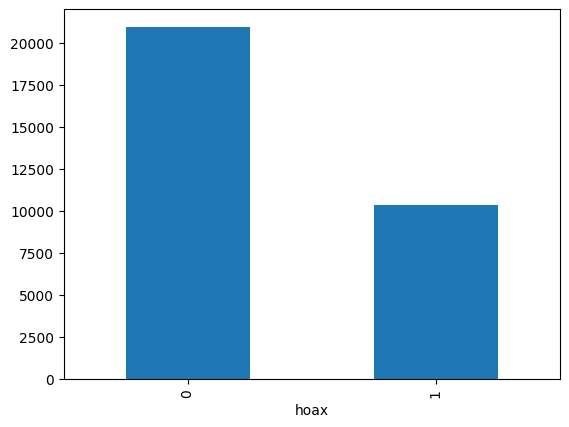

In [ ]:
df.groupby('hoax').size().plot(kind='bar')

The word that appear most frequently

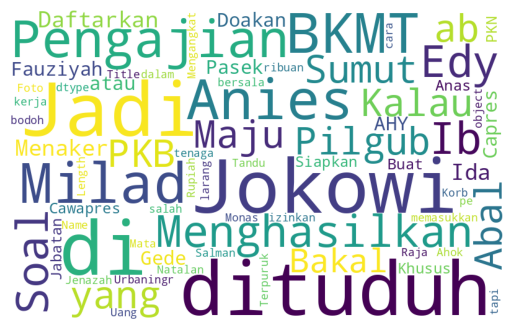

In [ ]:
text = df['Title']

wordcloud = WordCloud(background_color='white',width=800, height=500,max_font_size=120,random_state=21,).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Data Preparation

### Check and drop null value

In [ ]:
df.isnull().sum()

Title    21
hoax      0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Title    0
hoax     0
dtype: int64

## Train test split
test dataset is used for evaluation

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=1, stratify=df['hoax'])

In [ ]:
print(train_df.shape)
print(test_df.shape)

(28198, 2)
(3134, 2)


In [ ]:
title = train_df.Title.values
labels = train_df.hoax.values

## BERT Tokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
print(' Original: ', title[1])

print('Tokenized: ', tokenizer.tokenize(title[1]))

print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(title[0])))

 Original:  Politisi PAN Nilai Reshuffle Kabinet Masih Berorientasi Politik
Tokenized:  ['Pol', '##itis', '##i', 'PAN', 'Nil', '##ai', 'Res', '##hu', '##ffle', 'Ka', '##bine', '##t', 'Mas', '##ih', 'Be', '##ror', '##ient', '##asi', 'Politik']
Token IDs:  [100, 19911, 91902, 51457, 13318, 10155, 10174, 27270, 14394, 10676, 12718, 11359, 22786, 11170, 32194, 54055, 119, 17815, 49409, 10310, 78444, 10206, 100]


In [ ]:
def print_token():
  index = 15
  table = np.array([tokenizer.tokenize(title[index]),
                    tokenizer.convert_tokens_to_ids(tokenizer.tokenize(title[index]))]).T
  print(tabulate(table,
                 headers = ['Tokens', 'Token IDs'],
                 tablefmt = 'fancy_grid'))

print_token()

╒═══════════╤═════════════╕
│ Tokens    │   Token IDs │
╞═══════════╪═════════════╡
│ Indonesia │       11658 │
├───────────┼─────────────┤
│ Di        │       12944 │
├───────────┼─────────────┤
│ ##ja      │       10320 │
├───────────┼─────────────┤
│ ##jah     │       27494 │
├───────────┼─────────────┤
│ Belanda   │       26533 │
├───────────┼─────────────┤
│ Selama    │       75345 │
├───────────┼─────────────┤
│ 350       │       14992 │
├───────────┼─────────────┤
│ Tahun     │       32544 │
├───────────┼─────────────┤
│ ,         │         117 │
├───────────┼─────────────┤
│ Ben       │       13304 │
├───────────┼─────────────┤
│ ##ark     │       36269 │
├───────────┼─────────────┤
│ ##ah      │       12257 │
├───────────┼─────────────┤
│ ?         │         136 │
╘═══════════╧═════════════╛


Hitung panjang maksimal teks

In [ ]:
max_len = 0

for ttl in title:
    input_ids = tokenizer.encode(ttl, add_special_tokens=True)
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  91


In [ ]:
input_ids = []
attention_masks = []

for txt in title:
    encoded_dict = tokenizer.encode_plus(
                        txt,
                        add_special_tokens = True,
                        max_length = max_len,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

print('Original: ', title[1])
print('Token IDs:', input_ids[1])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  Politisi PAN Nilai Reshuffle Kabinet Masih Berorientasi Politik
Token IDs: tensor([  101, 38432, 36967, 10116, 77968, 66163, 11542, 32070, 13723, 66267,
        25444, 36848, 10123, 16423, 13187, 14321, 30101, 15617, 15525, 29505,
          102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0])


In [ ]:
def print_attention_token():
  index = 1
  tokens = tokenizer.tokenize(tokenizer.decode(input_ids[index]))
  token_ids = [i.numpy() for i in input_ids[index]]
  attention = [i.numpy() for i in attention_masks[index]]

  table = np.array([tokens, token_ids, attention]).T
  print(tabulate(table,
                 headers = ['Tokens', 'Token IDs', 'Attention Mask'],
                 tablefmt = 'fancy_grid'))

print_attention_token()

╒══════════╤═════════════╤══════════════════╕
│ Tokens   │   Token IDs │   Attention Mask │
╞══════════╪═════════════╪══════════════════╡
│ [CLS]    │         101 │                1 │
├──────────┼─────────────┼──────────────────┤
│ Pol      │       38432 │                1 │
├──────────┼─────────────┼──────────────────┤
│ ##itis   │       36967 │                1 │
├──────────┼─────────────┼──────────────────┤
│ ##i      │       10116 │                1 │
├──────────┼─────────────┼──────────────────┤
│ PAN      │       77968 │                1 │
├──────────┼─────────────┼──────────────────┤
│ Nil      │       66163 │                1 │
├──────────┼─────────────┼──────────────────┤
│ ##ai     │       11542 │                1 │
├──────────┼─────────────┼──────────────────┤
│ Res      │       32070 │                1 │
├──────────┼─────────────┼──────────────────┤
│ ##hu     │       13723 │                1 │
├──────────┼─────────────┼──────────────────┤
│ ##ffle   │       66267 │        

## Train-validation split
80% of data is split into train and 20% to validation sets.

In [ ]:
dataset = TensorDataset(input_ids, attention_masks, labels)

train_size = int(0.8 * len(dataset))
val_size = len(dataset)  - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

22,558 training samples
5,640 validation samples


In [ ]:
batch_size = 32

train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size
        )

validation_dataloader = DataLoader(
            val_dataset,
            sampler = SequentialSampler(val_dataset),
            batch_size = batch_size
        )

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased",
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
)

model = model.cuda()

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Fine Tuning

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
epochs = 3

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
training_stats = []

total_t0 = time.time()

for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time()
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        optimizer.zero_grad()
        output = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)
        loss = output.loss
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    avg_train_loss = total_train_loss / len(train_dataloader)
    training_time = format_time(time.time() - t0)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))

    print("")
    print("Running Validation...")
    t0 = time.time()
    model.eval()
    total_eval_accuracy = 0
    best_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        with torch.no_grad():
            output= model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
        loss = output.loss
        total_eval_loss += loss.item()
        logits = output.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_eval_accuracy += flat_accuracy(logits, label_ids)
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    validation_time = format_time(time.time() - t0)
    if avg_val_accuracy > best_eval_accuracy:
        torch.save(model, 'bert_model')
        best_eval_accuracy = avg_val_accuracy
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...

  Average training loss: 0.16
  Training epoch took: 0:05:40

Running Validation...
  Accuracy: 0.97

======== Epoch 2 / 3 ========
Training...

  Average training loss: 0.07
  Training epoch took: 0:05:41

Running Validation...
  Accuracy: 0.98

======== Epoch 3 / 3 ========
Training...

  Average training loss: 0.04
  Training epoch took: 0:05:41

Running Validation...
  Accuracy: 0.98

Training complete!
Total training took 0:18:46 (h:mm:ss)


# Evaluation

### Load best model

In [ ]:
model = torch.load('bert_model')

In [ ]:
test_text = test_df['Title'].values

In [ ]:
test_input_ids = []
test_attention_masks = []
for txt in test_text:
    encoded_dict = tokenizer.encode_plus(
                        txt,
                        add_special_tokens = True,
                        max_length = max_len,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )
    test_input_ids.append(encoded_dict['input_ids'])
    test_attention_masks.append(encoded_dict['attention_mask'])
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
test_dataset = TensorDataset(test_input_ids, test_attention_masks)
test_dataloader = DataLoader(
            test_dataset,
            sampler = SequentialSampler(test_dataset),
            batch_size = batch_size
        )

In [ ]:
predictions = []
for batch in test_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        with torch.no_grad():
            output= model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask)
            logits = output.logits
            logits = logits.detach().cpu().numpy()
            pred_flat = np.argmax(logits, axis=1).flatten()

            predictions.extend(list(pred_flat))

In [ ]:
test_df['prediction'] =predictions
test_df

,Title,hoax,prediction
181,"Kaesang Ingin Terjun ke Politik, Jokowi Ogah C...",0,0
3452,"Jokowi Ungkap Capres Ideal, Relawan Sebut Iden...",0,0
1534,"Survei Populi Center, Popularitas Prabowo Subi...",0,0
1814,"Foto “Masjid Meledak Saat Waktu Sholat Jumat, ...",1,1
2113,Survei IPO: 60 Persen Tak Puas dengan Kinerja ...,0,0
...,...,...,...
3006,Video Akting Plandemi Jenazah Pasien Covid-19 ...,1,1
6833,Rencana Jadwal Pilpres 2024: Pendaftaran Capre...,0,0
3516,Kilas Balik Pendirian PAN 24 Tahun Lalu: Refor...,0,0
1001,"Klaim Punya Kedekatan dengan PPP dan PKB, PDI-...",0,0


In [ ]:
target_names = ['0', '1']
print(classification_report(test_df['hoax'].values, test_df['prediction'].values, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2096
           1       0.98      0.96      0.97      1038

    accuracy                           0.98      3134
   macro avg       0.98      0.98      0.98      3134
weighted avg       0.98      0.98      0.98      3134



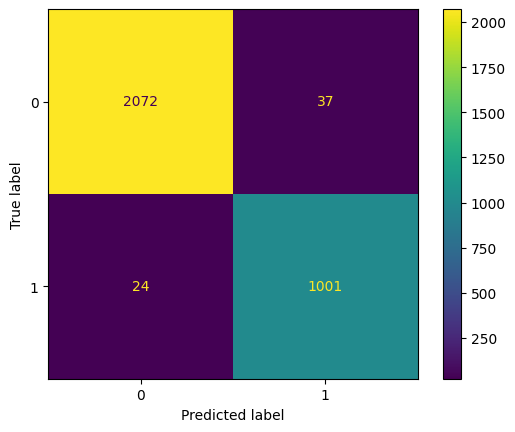

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_df['prediction'].values, test_df['hoax'].values);

In [ ]:
# test_df.to_csv('result.csv', index = False)

In [ ]:
torch.save(model.state_dict(), 'model.pth')

In [ ]:
saved_model = model.load_state_dict(torch.load('model_path.pth'))

In [ ]:
test_predict = " Jutaan Pendukung Prabowo Berbalik Arah Mendukung Ganjar"

encoded_dict = tokenizer.encode_plus(
                    test_predict,
                    add_special_tokens=True,
                    max_length=max_len,
                    pad_to_max_length=True,
                    return_attention_mask=True,
                    return_tensors='pt',
               )

test_input_ids = encoded_dict['input_ids'].to(device)
test_attention_mask = encoded_dict['attention_mask'].to(device)

with torch.no_grad():
    output = model(test_input_ids, attention_mask=test_attention_mask)
    logits = output.logits
    logits = logits.detach().cpu().numpy()
    pred_label = np.argmax(logits, axis=1).flatten()[0]

print(f"Predicted Label: {pred_label}")


Predicted Label: 1
